# (Dataset Exploration Title)
 
 by ISTAM KULLIEV

Table of Contents¶

Introduction

Part I - Gathering Data

Part II - Assessing Data

Part III - Cleaning Data

Part IV - Univariate Exploration

Part V - Bivariate Exploration

Part VI - Multivariate Exploration



# Introduction


Ford GoBike is a regional public bicycle sharing system in USA.

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. 

The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.
In recent years, bicycle sharing systems have been growing and gaining diversity around the world.
It allows bike users to rent bikes for short trips. In this project, I will conduct a research analysis of the data provided by Ford GoBike.

The Ford GoBike system data is a collection of travel information for public use of the bike service. 

Variables include customer type, year of birth and gender, travel duration, start time and end time date, start station and end station names, start and end coordinates.

This data explores the Ford GoBike's trip data for public containing approximately 183,000 bike rides.

## Part I - Gathering Data

In [2]:
# Import all packages and set plots to be embedded inline
from requests import get
from os import path, getcwd, makedirs, listdir 
from io import BytesIO
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import seaborn as sb
import datetime
import math
import calendar
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
%matplotlib inline

> Load  dataset and describe its properties through the questions below.

In [83]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

# Part II - Assessing Data

In [84]:
# Visually check first 3 records
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


In [85]:
# info of dataframe
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [86]:
# Check for existing duplicates
df.duplicated().sum()

0

In [87]:
# View descriptive statistics of the dataframe
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000



Quality issues

user type, gender and bike_share_for_all_trip can be set to category

bike id, start_station_id, end_station_id can be set to object

we can calculate the age of the user

we can further enhance the dataset with more details about the time like month, day, hour, weekday

we can calculate weekly rides and user types 

we can calculate correlation between variables

# Part III - Cleaning Data

In [9]:
df2 = df.copy()
df2['start_time'] = pd.to_datetime(df2['start_time'])
df2['end_time'] = pd.to_datetime(df2['end_time'])

df2['start_station_id'] = df2['start_station_id'].astype('str')
df2['end_station_id'] = df2['end_station_id'].astype('str')
df2['bike_id'] = df2['bike_id'].astype('str')

df2['user_type'] = df2['user_type'].astype('category')
df2['member_gender'] = df2['member_gender'].astype('category')

df2.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [10]:
# 2 For the duration of the trip, we will add new columns for the start date of the trip in yyyy-mm-dd format, the start time of the day, the day of the week and the month in minutes in time format

df2['duration_minute'] = df2['duration_sec']/60
df2.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,708.683333


# Calculating the age of members

Determining the age of subscribes and customers based on their year of birth.


In [11]:
# Calculate member_age from member_birth_year.
df2['member_age'] = 2021 - df2['member_birth_year']
df2.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,duration_minute,member_age
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,175147.000000,183412.000000,175147.000000
mean,726.078435,37.771223,-122.352664,37.771427,-122.352250,1984.806437,12.101307,36.193563
std,1794.389780,0.099581,0.117097,0.099490,0.116673,10.116689,29.906496,10.116689
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,1.016667,20.000000
25%,325.000000,37.770083,-122.412408,37.770407,-122.411726,1980.000000,5.416667,29.000000
50%,514.000000,37.780760,-122.398285,37.781010,-122.398279,1987.000000,8.566667,34.000000
75%,796.000000,37.797280,-122.286533,37.797320,-122.288045,1992.000000,13.266667,41.000000
max,85444.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,1424.066667,143.000000


In [12]:
df2.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000,37.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,708.683333,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000,49.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667,32.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667,47.0


#### Determine the year, month, days of the week, and hours of cycling based on start_time data.

In [54]:
df2['start_date'] = df2.start_time.dt.strftime('%Y-%m-%d')
df2['start_hourofday'] = df2.start_time.dt.strftime('%H')
df2['start_dayofweek'] = df2.start_time.dt.strftime('%A')
df2['start_month'] = df2.start_time.dt.strftime('%B')
df2.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,duration_minute,member_age,start_date,start_hourofday,start_dayofweek,start_month,age_bins
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,869.750000,37.0,2019-02-28,17,Thursday,February,31 - 40
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,NaN,NaN,No,708.683333,NaN,2019-02-28,18,Thursday,February,NaN


In [56]:
df2.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

Look at the duration dependency on Gender.

# For type of users

<Figure size 720x720 with 0 Axes>

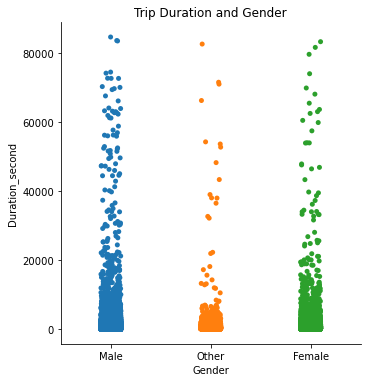

In [64]:
plt.figure(figsize = [10, 10])
sb.catplot(data = df, x = 'member_gender', y = 'duration_sec')
plt.title('Trip Duration and Gender')
plt.xlabel('Gender')
plt.ylabel('Duration_second')
plt.show()

In [81]:
df2.member_age.mean()

36.19356312126385

In [82]:
df2.member_age.describe(percentiles = [ .97])

count    175147.000000
mean         36.193563
std          10.116689
min          20.000000
50%          34.000000
97%          60.000000
max         143.000000
Name: member_age, dtype: float64

Define
Remove age outliers. As mentioned in the Quality issues, there are customers with the birth year before 1900 thus customers with age above 100 years. As 97% of the users are below 58 , I am going to keep users below 60.

### What is the structure of your dataset?

> Dataset Overview The forgobike trip data are more 1,83 thousands rides and 16 variables that happend 2019 in february.

> There is 16 columns, and different variable types like (int - float - string - bool) but the most type are numeric.

### What is/are the main feature(s) of interest in your dataset?

> There is many like:

Gender
Average riding duration
Member age
Age groups of users

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>I think that the age group, gender, duration of use and purpose of use are the most important data to focus on.

# Part IV - Univariate Exploration

## Univariate Exploration

I'll start by looking at the weekly trend of number of bike rentals and distribution and hours of the day. 

I will also explore the duration of the trips.


In [18]:
df2['age_bins'] = df2['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '21 - 30' if 20<x<=30
                                                  else '31 - 40' if 30<x<=40
                                                  else '41 - 50' if 40<x<=50
                                                  else '51 - 61' if 50<x<=60
                                                  else '61 - 100' if 61<x<=100
                                                           else x)
subscriber_age_df  = df2[df2['user_type'] == 'Subscriber'].groupby(['start_dayofweek','age_bins'  ]).agg({'bike_id':'count'}).reset_index()
subscriber_age_df .sample()

,start_dayofweek,age_bins,bike_id
40,Thursday,121,3


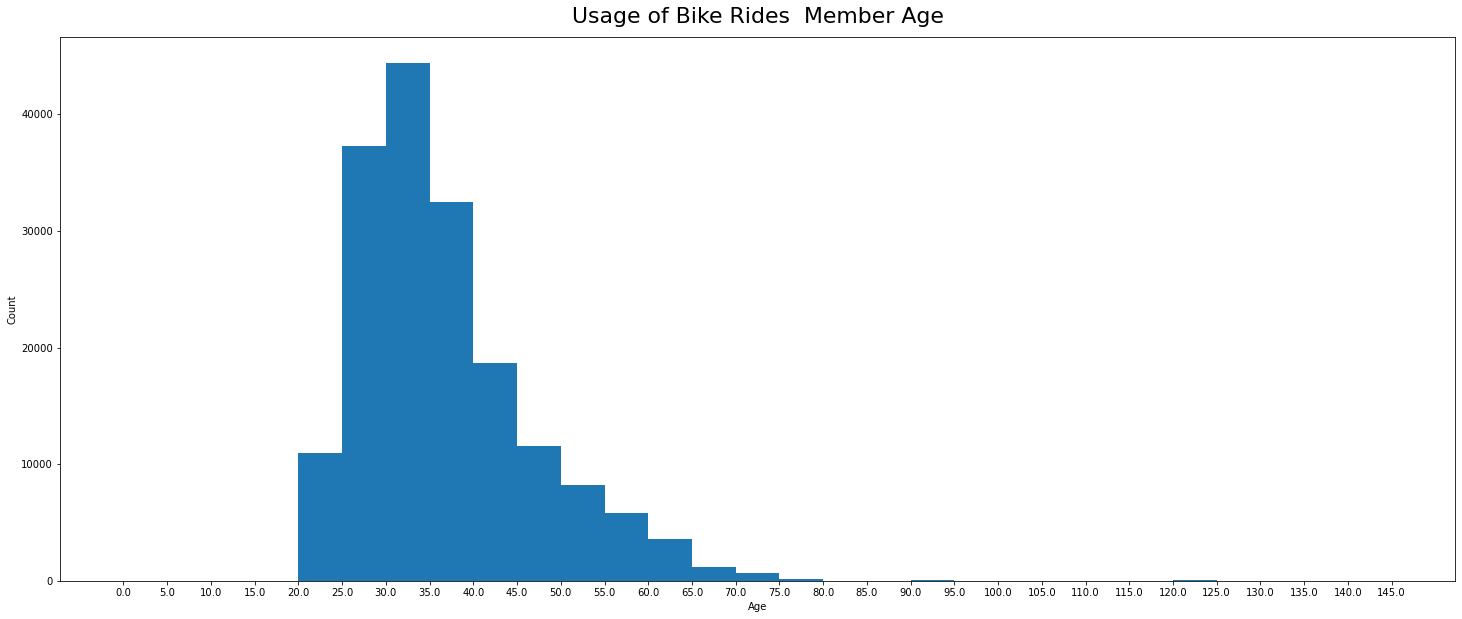

In [20]:
plt.figure(figsize=[25, 10]);
bins = np.arange(0, df2['member_age'].max()+5, 5)
plt.hist(data=df2, x='member_age', bins=bins);
plt.xticks(bins, bins);
plt.title('Usage of Bike Rides  Member Age', fontsize=22, y=1.015)
plt.xlabel('Age');
plt.ylabel('Count');

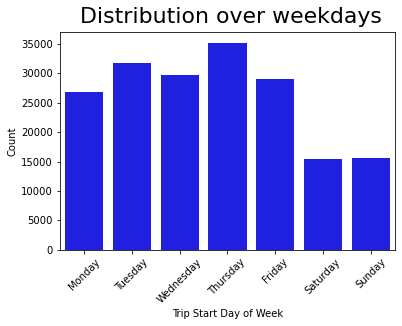

In [21]:
# trip distribution over weekdays

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df2['start_dayofweek'] = df2['start_dayofweek'].astype(weekdaycat)
plt.xticks(rotation=45);
sb.countplot(data=df2, x='start_dayofweek', color="b");
plt.title(' Distribution over weekdays', fontsize=22, y=1.015)
plt.xlabel('Trip Start Day of Week');
plt.ylabel('Count');

The bike share system is mainly used during weekdays, with Tuesday and Thursday as the most popular days for bike rides.

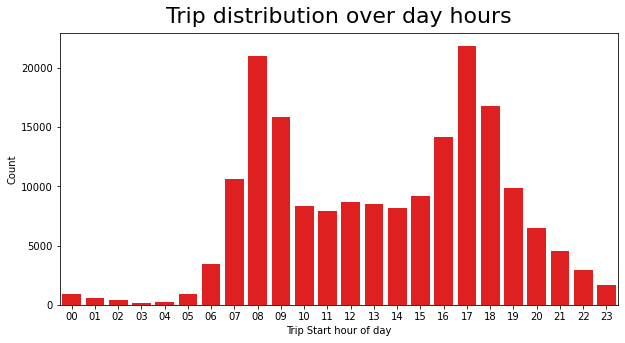

In [22]:
# trip distribution over hour of day

plt.rcParams['figure.figsize'] = 10, 5
sb.countplot(x='start_hourofday', data=df2.sort_values(by=['start_hourofday']), color="r")
plt.title('Trip distribution over day hours', fontsize=22, y=1.015)
plt.xlabel('Trip Start hour of day');
plt.ylabel('Count');


The dayly distribution is bivariate. The system is used mainly around 8-9am and 4-6pm when people get to and gat back from work and study.

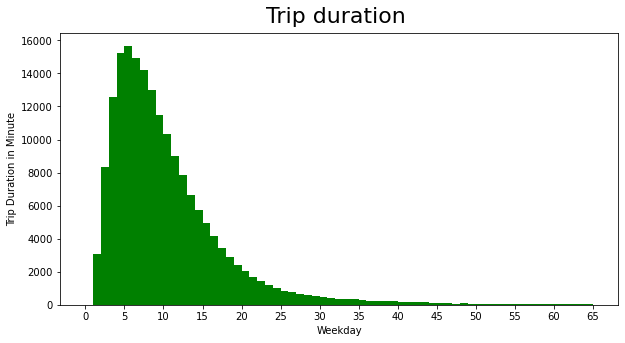

In [23]:
bins = np.arange(0, 66, 1)
ticks = np.arange(0, 66, 5)
plt.hist(data=df2, x='duration_minute', bins=bins, color="g");
plt.xticks(ticks, ticks);
plt.title('Trip duration ', fontsize=22, y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Trip Duration in Minute');

At the histogram, we can see that trip durations are no longer than 65 min and usually last 5 to 20 min. 

# Part V - Bivariate Exploration

In this section I will further explore the dataset by adding the customer type to the analysis.

In [22]:
# calculating % split for the user type
customer = df2.query('user_type == "Customer"')['bike_id'].count()
subscriber = df2.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / df2['bike_id'].count()
subscriber_proportion = subscriber / df2['bike_id'].count()

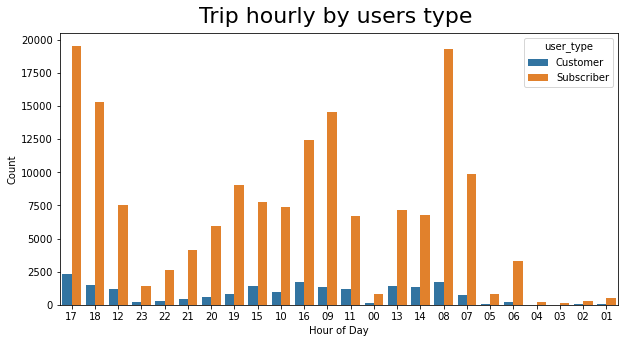

In [24]:
sb.countplot(data=df2, x='start_hourofday', hue='user_type');
plt.title('Trip hourly by users type ', fontsize=22, y=1.015)
plt.xlabel('Hour of Day');
plt.ylabel('Count');

# Part VI - Multivariate Exploration
In this section I'll further explore the dataset by adding gender to the customer type and check the hourly distribution of bike rides during weekdays for customers and subscribers.

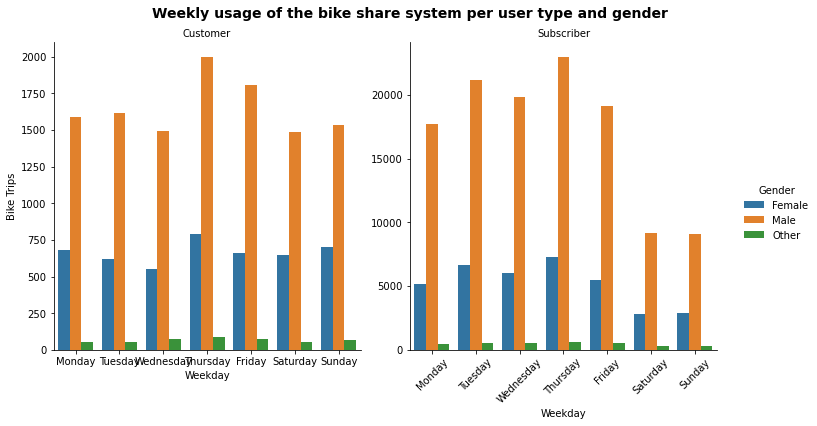

In [36]:
# weekly usege of the bike sharing system per user type and gender

g = sb.catplot(data=df2, x='start_dayofweek', col="user_type", hue="member_gender", kind='count', sharey = False)
g.set_axis_labels("Weekday", "Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike share system per user type and gender', y=1.03, fontsize=14, fontweight='semibold');
plt.xticks(rotation=45);

The trend is very similar for men and women: the highest demand for shoppers falls on Wednesdays and Thursdays of the week.

the highest demand for subscribers was from Monday to Friday, with Thursday peaking.

As in the previous section, this trend is very similar for men and women: customers use the system more often on weekends than on weekdays (although jumping on a bike used on weekends is much higher than for men)

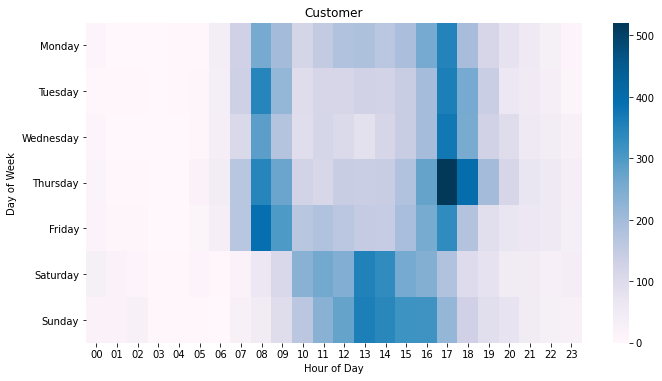

In [28]:
plt.figure(figsize=[10, 10]);

plt.subplot(2, 1, 1)
customers = df2.query('user_type == "Customer"')
cus_count = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
cus_count = cus_count.reset_index(name='count')
cus_count = cus_count.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(cus_count, cmap='PuBu');
plt.title('Customer');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout();

The analysis shows that the highest demand was on Wednesday, February 17th.

Demand was high in mid-February 2019, with demand high during the weekdays from Monday to Saturday.


### Customers use the bike sharing system more often on weekdays:

weekdays: most bike rides hapen around 8-9am and 5-6pm with the peak on Fridays around 5pm

weekends: most bike rides happen between 10am - 8pm with the peak on Saturdays around 2pm

 #### February 2019 was in high demand from February 9-20. 

As in the previous section, this trend is very similar for men and women: customers use the system more often on weekends than on weekdays (although jumping on a bike used on weekends is much higher than for men)